In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('prepd_data.csv')
df

,Unnamed: 0,review,sentiment,sentiment_label
0,0,one review mention watch oz episod hook right ...,positive,1
1,1,wonder littl product film techniqu unassum old...,positive,1
2,2,thought wonder way spend time hot summer weeke...,positive,1
3,3,basic famili littl boy jake think zombi closet...,negative,0
4,4,petter mattei love time money visual stun film...,positive,1
...,...,...,...,...
49995,49995,thought movi right good job creativ origin fir...,positive,1
49996,49996,bad plot bad dialogu bad act idiot direct anno...,negative,0
49997,49997,cathol taught parochi elementari school nun ta...,negative,0
49998,49998,go disagr previou comment side maltin one seco...,negative,0


In [4]:
df.columns

Index(['Unnamed: 0', 'review', 'sentiment', 'sentiment_label'], dtype='object')

In [5]:
#dropping unnecessary columns
df.drop(columns=['Unnamed: 0','sentiment'],inplace=True)

In [6]:
df.isnull().sum()

review             0
sentiment_label    0
dtype: int64

In [7]:
df['sentiment_label'].value_counts()

sentiment_label
1    25000
0    25000
Name: count, dtype: int64

In [8]:
df

,review,sentiment_label
0,one review mention watch oz episod hook right ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job creativ origin fir...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,go disagr previou comment side maltin one seco...,0


In [36]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
X,y = df['review'],df['sentiment_label']

In [18]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [19]:
X_train.shape,X_test.shape

((35000,), (15000,))

In [37]:
pip_obj = Pipeline(steps = [('td_V',TfidfVectorizer()),
                            ('td_T',TfidfTransformer()),
                           ('sv_c',LinearSVC())])

In [38]:
pip_obj.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('td_V', TfidfVectorizer()), ('td_T', TfidfTransformer()),
                ('sv_c', LinearSVC())])

In [40]:
pred = pip_obj.predict(X_test)

In [41]:
pred

array([1, 0, 1, ..., 1, 1, 0])

In [74]:
from sklearn.metrics import confusion_matrix , accuracy_score ,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sn

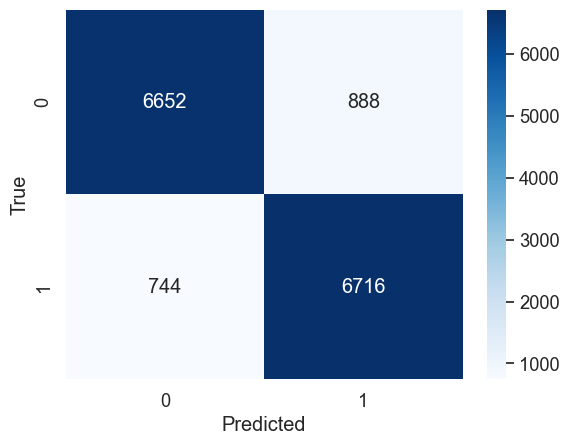

In [75]:
cm = confusion_matrix(y_test,pred)
sn.set(font_scale=1.2)
sn.heatmap(cm,annot = True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
acc = accuracy_score(y_test,pred)
recll = recall_score(y_test,pred)
precsn = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)

In [77]:
print('Performance Metrics :','\nAccuracy : ',acc,'\nRecall : ',recll,'\nPrecision : ',precsn,'\nF1-Score : ',f1)

Performance Metrics : 
Accuracy :  0.8912 
Recall :  0.9002680965147453 
Precision :  0.8832193582325092 
F1-Score :  0.8916622411046203


In [78]:
#testing with random text
movie_reviews = [
    "The acting in this film was superb.",
    "The plot was confusing and hard to follow.",
    "I found the cinematography to be stunning.",
    "The dialogue felt forced and unnatural.",
    "Overall, I was disappointed with the lackluster ending."
]

In [80]:
pip_obj.predict(movie_reviews)

array([1, 0, 1, 0, 0])